# D1.9 demonstrator

The Virtual Brain models successfully predict evolution of brain activity within the
anatomical constraints and can be personalized in order to describe changes of
subject's brain activity across brain states and a range of diseases. However, these
models currently lack the capacity to represent functionally meaningful processes
such as cognition.

This prototype combines a visual task early processing with brain network model activity propagation.

## Brain network model of response to the visual stimulus

The current prototype consists of three integrated components: high-resolution Brain Network Model (BNM), mean-field models capturing distinct brain states (awake, sleep), and a deep neural network
processing of visual input. The BNM receives inputs to the V1 mapped from the output of a CNN processing naturalistic scene images yeilding two streams of information processing using
the virtual brain (lower branch in figure below) and artificial neural network (middle stream).

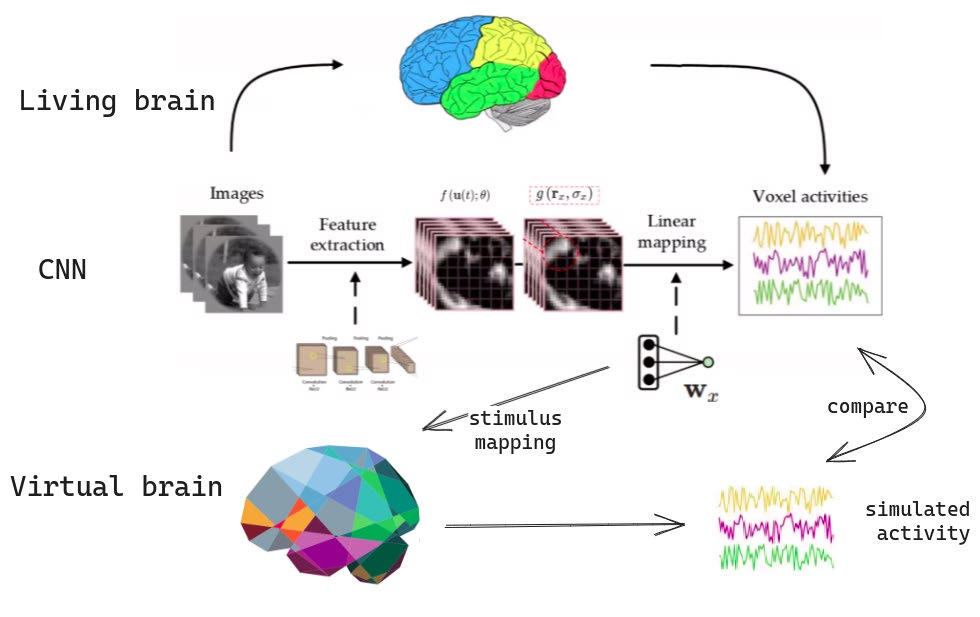

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
import os

from wp123_demo.adex_sim import load_csr_npz
from wp123_demo.viz import plot_sparse, plot_brain_multiview, load_mesh
from wp123_demo.data import fetch_precomputed, fetch_stim, path as data_path

In [3]:
data_dir = data_path('external/nsd')
stim_file = data_path('interim/stim.npz')

output_folder = data_path('interim/simulated_data')
precomputed_folder = data_path('interim/precomputed')

%mkdir -p $output_folder

## Connectivity

Say where are these from, the pipeline etc.

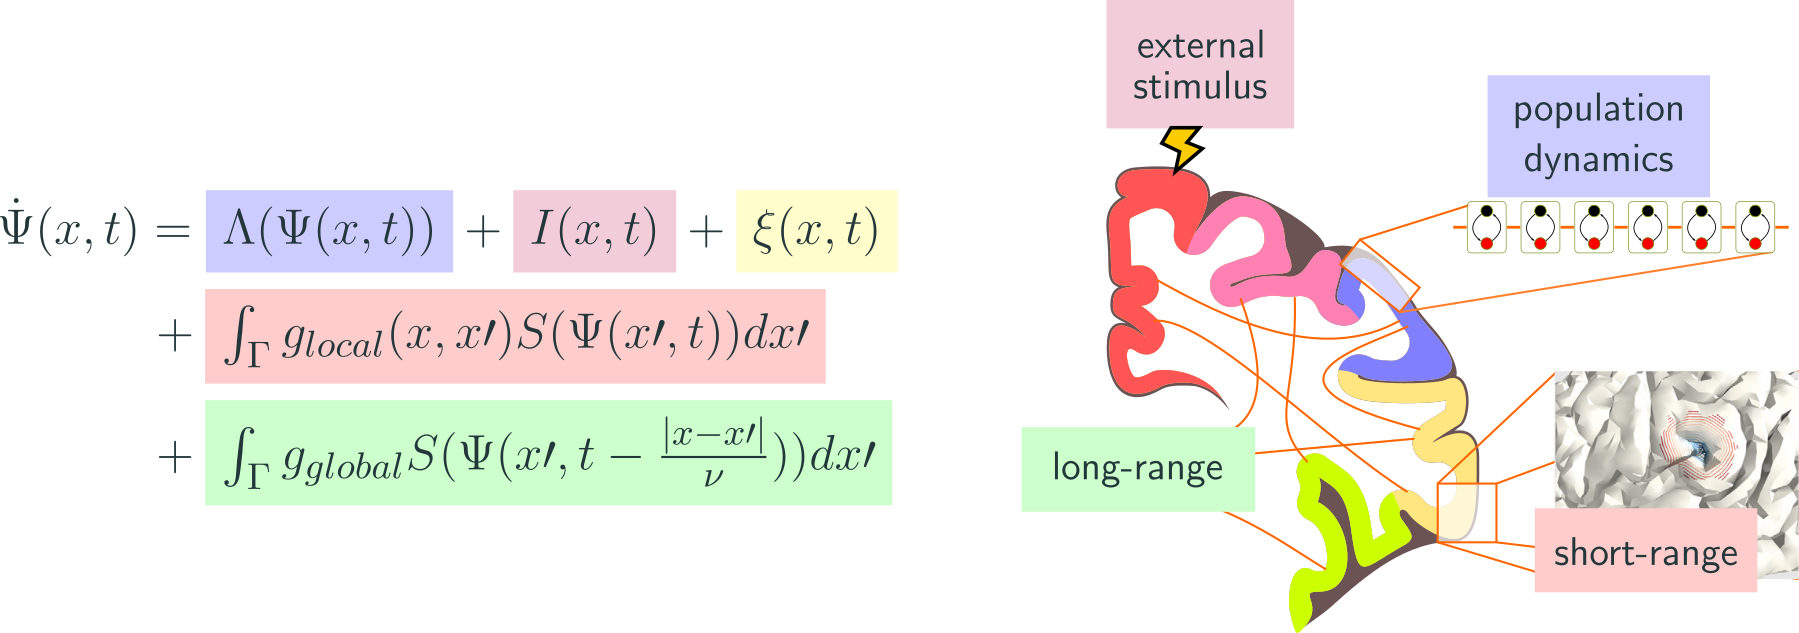

In [4]:
sc_file = f'{data_dir}/vert2vert_weights_ico5_500k.npz'
lc_file = f'{data_dir}/vert2vert_gdist_mat_ico5.npz'

In [5]:
import pooch

In [6]:
sc = load_csr_npz(sc_file, keep_diag=False)
lc = load_csr_npz(lc_file, keep_diag=False)

Explain what we see below

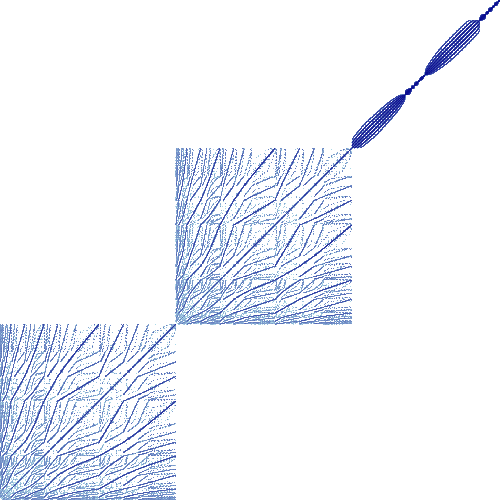

In [7]:
plot_sparse(lc)

Explain what we see below

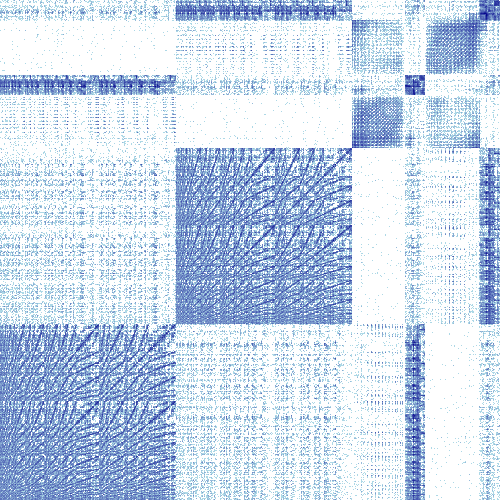

In [8]:
plot_sparse(sc)

## Simulation

The simulation code requires a GPU with OpenCL drivers. Please run in a suitable environment such as one of systems with GPUs of the FENIX RI.

The stimulus is a narrow gaussian centered at 2.2s as plotted below.

In [9]:
fetch_stim()

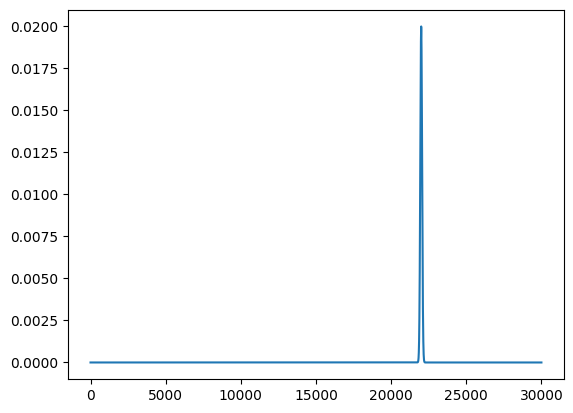

In [10]:
with np.load(stim_file) as f:
    stim_t = f['stim_t']
plt.plot(stim_t)

In [14]:
!python ../wp123_demo/adex_sim.py simulate --output_path=$output_folder --prefix=demo \
    --sc $sc_file --lc $lc_file --normalize True \
    --sc_a=0.01 --lc_a=0.001 --noise_scale=1.0 \
    --stim=$stim_file --sim_len=30 --debug=False

normalized to max weight = 1.0
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_Es.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_Is.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_C_ees.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_C_eis.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_C_iis.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_W_es.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_W_is.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_ou_drifts.npy ~0 GB
output /scratch/snx3000/bp000275/popcorn_WT_demo/data/interim/simulated_data/demo_bolds.npy ~0 GB
100%|█████████████████████████████████████████| 300/300 [00:04<00:00, 72.49it/s]
finishing.

## Visualization

In [11]:
import pyvista as pv

In [12]:
mesh = load_mesh(data_dir)
n_verts = mesh[0].n_points + mesh[1].n_points

The following cell enables 3d rendering on remote servers. Skip if running locally.

In [13]:
pv.start_xvfb()
pv.set_jupyter_backend('static')

Next we load the time-series of the excitatory population which we just simulated.

In [14]:
fetch_precomputed()

In [15]:
Es = np.load(f'{precomputed_folder}/Es_stim.npy')

In [16]:
stim_time = 2200

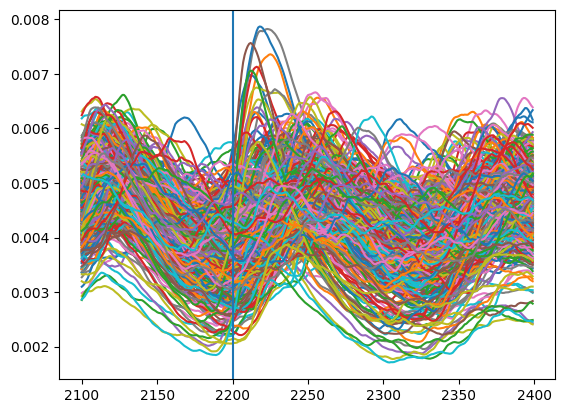

In [17]:
plt.plot(np.arange(2100,2400), Es[2100:2400,:500,0]);
plt.axvline(x=stim_time)

t=10ms


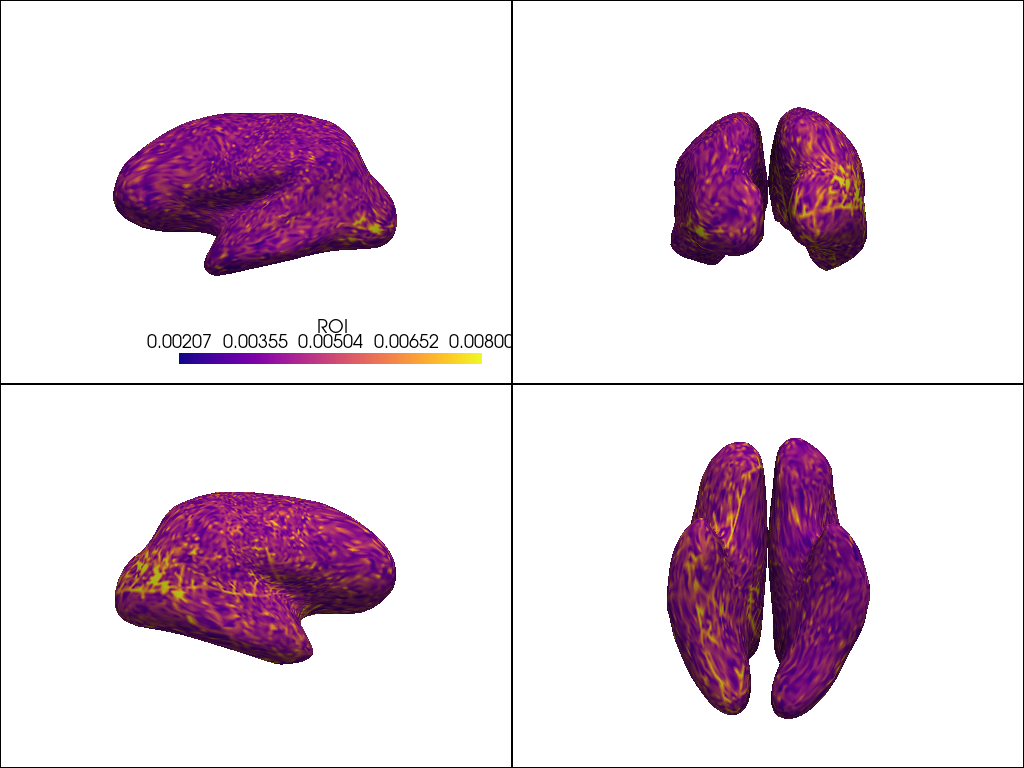

t=30ms


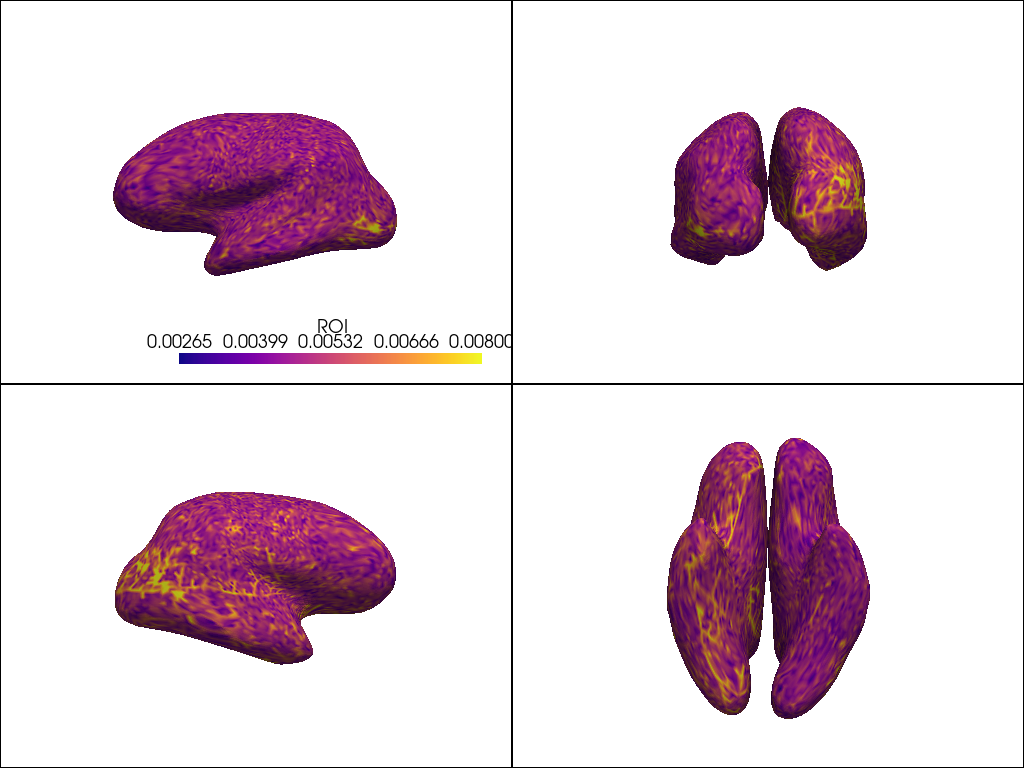

t=50ms


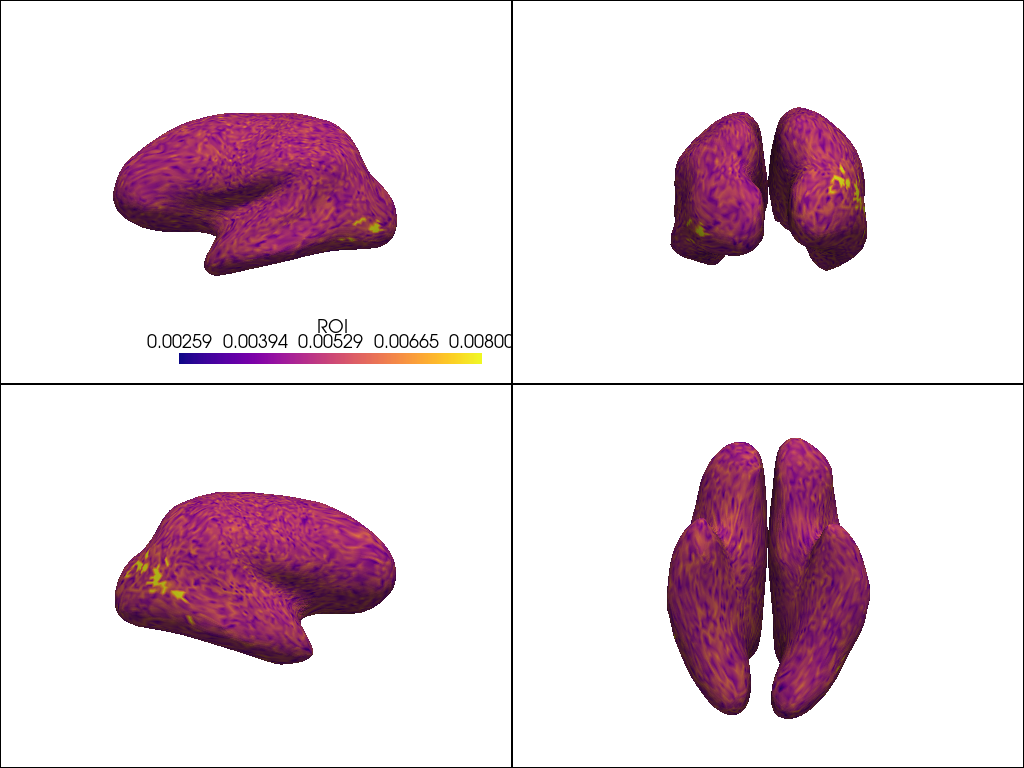

In [31]:
print('t=10ms')
plot_brain_multiview(mesh, Es[stim_time+10,:n_verts,0])
print('t=30ms')
plot_brain_multiview(mesh, Es[stim_time+30,:n_verts,0])
print('t=50ms')
plot_brain_multiview(mesh, Es[stim_time+50,:n_verts,0])

## Next steps

Next step is the systematic parameter exploration of the weights for the local
connectivity, global connectivity and stimulus to identify configurations where the model propagates
the perturbation from the V1 without being locked in the hyper excited high-firing rate regime (a
property of the AdEx mean field). This work is currently being performed using the EBRAINS HPC
infrastructure.